In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations

In [2]:
sample_input = '''Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II'''

In [3]:
def prepare_input(puzzle):
    valves = {}
    edges = {}
    destinations = {}
    for scan in puzzle.split('\n'):
        valves[scan[6:8]] = int(scan.split('=')[1].split(';')[0])
        if valves[scan[6:8]] != 0:
            destinations[scan[6:8]] = int(scan.split('=')[1].split(';')[0])
        scan = scan.replace('valves', 'valve')
        edges[scan[6:8]] = scan.split('valve ')[1].split(', ')
        
    return valves, edges, destinations

In [4]:
def find_path(G, point_A, point_B):
    return nx.shortest_path(G, point_A, point_B)

In [5]:
def combination_of_paths(destinations):
    # the most interesting nodes are those with flow rate > 0
    # idea to find all possible paths included those nodes
    
    return list(permutations(list(destinations.keys()), len(destinations.keys())))

In [6]:
def _30_minutes(G, path, valves):
    current_node = 'AA'
    no_of_visited = 0
    i = 0
    current_path = find_path(G, current_node, path[no_of_visited])
    minutes = 1
    opening = False
    opened = []
    #print(minutes, i, no_of_visited, opening, opened, current_node, current_path)
    while minutes <= 30:
        if opening == True:
            opened.append([minutes, current_node])
            opening = False
            no_of_visited += 1
            if no_of_visited >= len(path):
                break
            else:
                current_path = find_path(G, current_node, path[no_of_visited])
            i = 0
        elif current_path[-1] == current_path[i] and opening == False and valves[current_node] != 0:
            opening = True
            minutes += 1
        else:
            i += 1
            current_node = current_path[i] 
            minutes += 1
            
        #print(minutes, i, no_of_visited, opening, opened, current_node, current_path)
    #print(minutes, i, no_of_visited, opening, opened, current_node, current_path)
    
    return opened

In [7]:
def calculate_pressure(open_valves):
    released_pressure = 0
    for valve in open_valves:
        released_pressure += (31-valve[0])*valves[valve[1]]
        
    return released_pressure

{'BB': 13, 'CC': 2, 'DD': 20, 'EE': 3, 'HH': 22, 'JJ': 21}


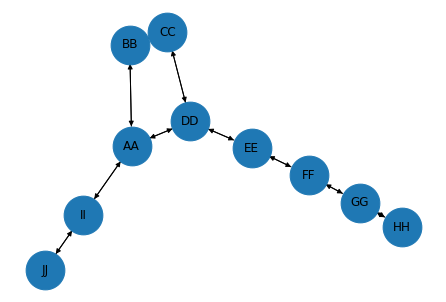

In [8]:
valves, edges, destinations = prepare_input(sample_input)
print(destinations)
G = nx.DiGraph(edges)
nx.draw(G, with_labels=True, node_size=1500)
paths = combination_of_paths(destinations)
released_pressures = []
for path in paths:
    released_pressures.append(calculate_pressure(_30_minutes(G, path, valves)))
result = max(released_pressures)

In [9]:
result

1651

In [11]:
valves, edges, destinations = prepare_input(puzzle_input)
#paths = combination_of_paths(destinations) # MemoryError
#released_pressures = []
#for path in paths:
#    released_pressures.append(calculate_pressure(_30_minutes(path, valves)))
#result = max(released_pressures)

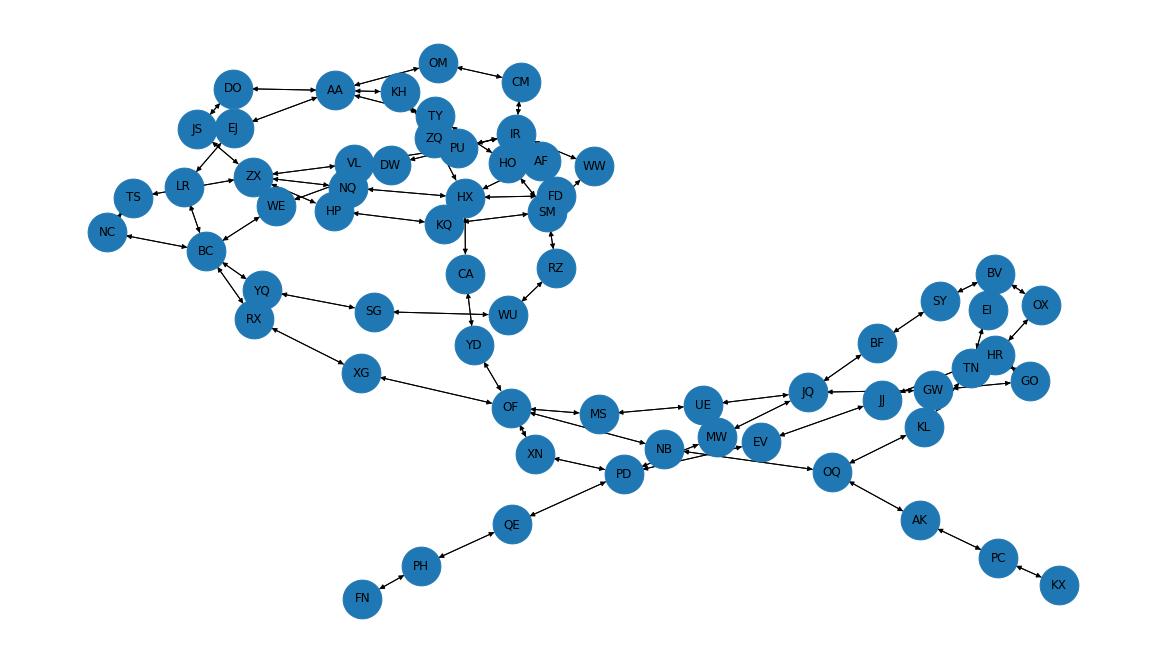

In [12]:
G = nx.DiGraph(edges)
plt.figure(figsize=(16, 9))
nx.draw(G, with_labels=True, node_size=1500)

In [10]:
puzzle_input = '''Valve OQ has flow rate=17; tunnels lead to valves NB, AK, KL
Valve HP has flow rate=0; tunnels lead to valves ZX, KQ
Valve GO has flow rate=0; tunnels lead to valves HR, GW
Valve PD has flow rate=9; tunnels lead to valves XN, EV, QE, MW
Valve NQ has flow rate=0; tunnels lead to valves HX, ZX
Valve DW has flow rate=0; tunnels lead to valves IR, WE
Valve TN has flow rate=24; tunnels lead to valves KL, EI
Valve JJ has flow rate=0; tunnels lead to valves EV, HR
Valve KH has flow rate=0; tunnels lead to valves ZQ, AA
Valve PH has flow rate=0; tunnels lead to valves FN, QE
Valve FD has flow rate=0; tunnels lead to valves SM, HX
Valve SM has flow rate=7; tunnels lead to valves WW, RZ, FD, HO, KQ
Valve PU has flow rate=0; tunnels lead to valves VL, IR
Valve OM has flow rate=0; tunnels lead to valves CM, AA
Valve KX has flow rate=20; tunnel leads to valve PC
Valve IR has flow rate=3; tunnels lead to valves PU, CM, WW, DW, AF
Valve XG has flow rate=0; tunnels lead to valves RX, OF
Valve QE has flow rate=0; tunnels lead to valves PH, PD
Valve GW has flow rate=0; tunnels lead to valves JQ, GO
Valve HO has flow rate=0; tunnels lead to valves SM, TY
Valve WU has flow rate=0; tunnels lead to valves SG, RZ
Valve MS has flow rate=0; tunnels lead to valves UE, OF
Valve JS has flow rate=0; tunnels lead to valves DO, ZX
Valve YQ has flow rate=0; tunnels lead to valves BC, SG
Valve EJ has flow rate=0; tunnels lead to valves AA, LR
Valve EI has flow rate=0; tunnels lead to valves BV, TN
Valve NC has flow rate=0; tunnels lead to valves TS, BC
Valve AF has flow rate=0; tunnels lead to valves IR, HX
Valve OX has flow rate=0; tunnels lead to valves HR, BV
Valve BF has flow rate=0; tunnels lead to valves JQ, SY
Valve CA has flow rate=0; tunnels lead to valves YD, HX
Valve KQ has flow rate=0; tunnels lead to valves HP, SM
Valve NB has flow rate=0; tunnels lead to valves OQ, OF
Valve SY has flow rate=0; tunnels lead to valves BF, BV
Valve AA has flow rate=0; tunnels lead to valves KH, EJ, OM, TY, DO
Valve BC has flow rate=11; tunnels lead to valves WE, RX, YQ, LR, NC
Valve HR has flow rate=14; tunnels lead to valves OX, GO, JJ
Valve WE has flow rate=0; tunnels lead to valves DW, BC
Valve MW has flow rate=0; tunnels lead to valves JQ, PD
Valve DO has flow rate=0; tunnels lead to valves JS, AA
Valve PC has flow rate=0; tunnels lead to valves AK, KX
Valve YD has flow rate=0; tunnels lead to valves CA, OF
Valve RX has flow rate=0; tunnels lead to valves XG, BC
Valve CM has flow rate=0; tunnels lead to valves IR, OM
Valve HX has flow rate=6; tunnels lead to valves ZQ, NQ, AF, FD, CA
Valve ZQ has flow rate=0; tunnels lead to valves KH, HX
Valve BV has flow rate=21; tunnels lead to valves SY, OX, EI
Valve AK has flow rate=0; tunnels lead to valves PC, OQ
Valve UE has flow rate=0; tunnels lead to valves MS, JQ
Valve LR has flow rate=0; tunnels lead to valves BC, EJ
Valve JQ has flow rate=8; tunnels lead to valves MW, UE, BF, GW
Valve VL has flow rate=0; tunnels lead to valves PU, ZX
Valve EV has flow rate=0; tunnels lead to valves JJ, PD
Valve TS has flow rate=0; tunnels lead to valves NC, ZX
Valve RZ has flow rate=0; tunnels lead to valves SM, WU
Valve OF has flow rate=13; tunnels lead to valves XG, YD, NB, MS, XN
Valve WW has flow rate=0; tunnels lead to valves SM, IR
Valve TY has flow rate=0; tunnels lead to valves HO, AA
Valve XN has flow rate=0; tunnels lead to valves OF, PD
Valve SG has flow rate=15; tunnels lead to valves WU, YQ
Valve FN has flow rate=25; tunnel leads to valve PH
Valve KL has flow rate=0; tunnels lead to valves TN, OQ
Valve ZX has flow rate=5; tunnels lead to valves JS, HP, VL, NQ, TS'''